In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math 
import numpy as np

In [18]:
df = pd.read_csv("../extras/coordinates.csv")
df.head()

,x,y,date
0,363,323,15:40:42
1,362,323,15:40:42
2,361,323,15:40:42
3,360,322,15:40:42
4,360,322,15:40:42


In [26]:
date = df.iloc[:, 2]
date = pd.to_datetime(date, format="%H:%M:%S", errors="coerce")

<Axes: xlabel='day', ylabel='seconds'>

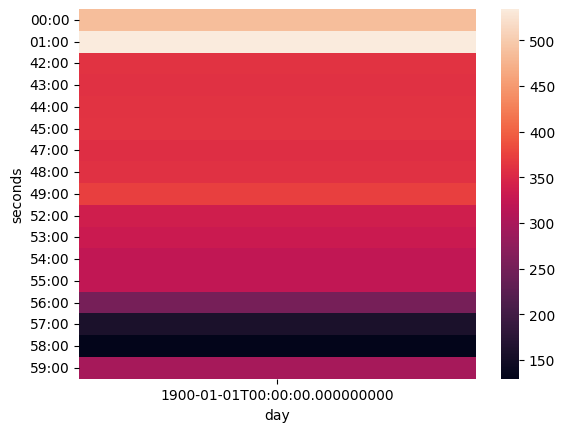

In [30]:
sns.heatmap(df.groupby([date.dt.normalize(), date.dt.strftime('%S:00')])
   ['x'].mean()
   .rename_axis(index=['day','seconds'])
   .unstack(level=0)
)

In [ ]:
s = (df.groupby([date.dt.isocalendar().week,
                 date.dt.strftime('%Y-%m-%d'), 
                 date.dt.strftime('%H:00')])
       ['x'].mean()
       .rename_axis(index=['day','hour'])
    )

fig, axes = plt.subplots(2,2, figsize=(10,10))
for w, ax in zip(s.index.unique('week'), axes.ravel()):
    sns.heatmap(s.loc[w].unstack(level='day'), ax=ax)
    ax.set_title(f'Week {w}')

In [7]:
df.iloc[0, 1]

323

In [4]:
def plot_heatmap(x, y):
    #DEFINE GRID SIZE AND RADIUS(h)
    grid_size=1
    h=10

    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    #FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    plt.pcolormesh(x_mesh,y_mesh,intensity)
    plt.plot(x,y,'ro')
    plt.colorbar()
    plt.show()

In [14]:
type(df.iloc[:, 2])

pandas.core.series.Series

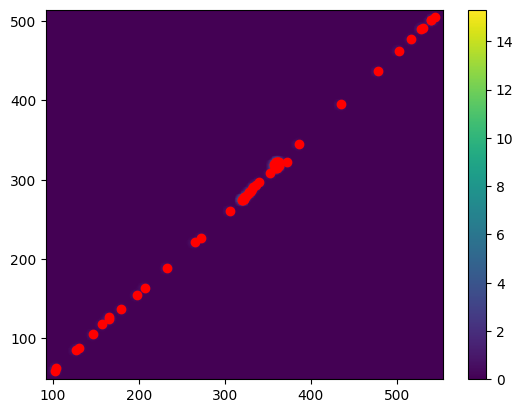

In [5]:
plot_heatmap(df.iloc[:, 0], df.iloc[:, 1])